# Model 0.2

Initial Position (x0) vs Capture Probability (P)
Random Seed and increments of x0

In [113]:
## Imports

In [114]:
%matplotlib inline 
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline


np.random.seed(42)

In [115]:
filename = 'data/x0vsP02.dat'

x0vsP = pd.read_csv(filename)
x0 = x0vsP['x0'].values.reshape(-1,1)
P = x0vsP['P'].values

sort = []
for i in range(len(x0)):
    sort.append([x0[i][0],P[i]])
sort = np.array(sorted(sort, key = itemgetter(0)))
x0 = sort[:,0][:-180].reshape(-1,1)
P = sort[:,1][:-180]

In [137]:
print(np.shape(P))
print(min(x0), max(x0))

(721,)
[-0.064903] [0.0078306]


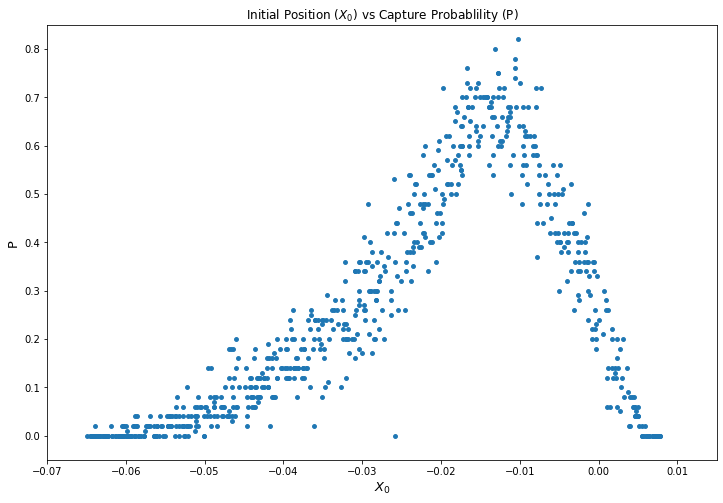

In [138]:
plt.figure(figsize=(12,8))
plt.scatter(x0,P, s = 15)
plt.axis([-0.07,0.015,-0.05,0.85])
plt.title("Initial Position ($X_0$) vs Capture Probablility (P)")
plt.xlabel("$X_0$", fontsize = 13)
plt.ylabel("P", fontsize = 13)
#plt.savefig("graphs/x0vsP02-1.png")
plt.show()

## Polynomial Regression

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x0,P,test_size = 0.2)

degree = 7
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
px_train = poly_features.fit_transform(x_train)
px_test = poly_features.fit_transform(x_test)

poly_reg = LinearRegression()
poly_reg.fit(px_train,y_train)
y_pred = poly_reg.predict(px_test)
error_mse = mse(y_test, y_pred)
error_r2 = r2_score(y_pred, y_test)

graph_x = np.linspace(x0[0],x0[-1],100).reshape(-1,1)
graph_px = poly_features.fit_transform(graph_x)
graph_y = poly_reg.predict(graph_px)

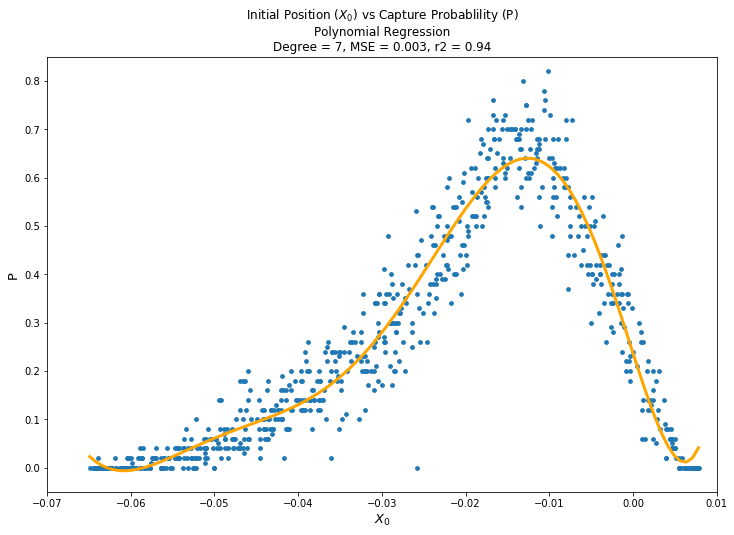

In [140]:
plt.figure(figsize=(12,8))
plt.scatter(x0,P, s = 14)
plt.plot(graph_x, graph_y, c = 'orange', linewidth =3)
plt.axis([-0.07,0.01,-0.05,0.85])
plt.title("Initial Position ($X_0$) vs Capture Probablility (P)\nPolynomial Regression\nDegree = {}, MSE = {:.2}, r2 = {:.2}".format(degree,error_mse,error_r2))
plt.xlabel("$X_0$", fontsize = 13)
plt.ylabel("P", fontsize = 13)
#plt.savefig("graphs/x0vsP02-2.png")
plt.show()

In [141]:
degrees = list(range(2,11))
print('{:10}{:13}{:11}{:12}{}'.format('Degree,','Train MSE,','Test MSE,','Train R2,','Test R2'))

for degree in degrees:
    poly_reg = LinearRegression()
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    px_train = poly_features.fit_transform(x_train)
    px_test = poly_features.fit_transform(x_test)
    poly_reg.fit(px_train, y_train)
    y_pred_train = poly_reg.predict(px_train)
    y_pred_test = poly_reg.predict(px_test)
    train_error_mse = mse(y_train,y_pred_train)
    test_error_mse = mse(y_test, y_pred_test)
    train_error_r2 = r2_score(y_train,y_pred_train)
    test_error_r2 = r2_score(y_test,y_pred_test)
    
    print('{:6},{:12.2},{:11.2},{:10.2},{:10.2}'.format(degree,train_error_mse,test_error_mse,train_error_r2,test_error_r2))
    

Degree,   Train MSE,   Test MSE,  Train R2,   Test R2
     2,       0.023,      0.024,      0.57,      0.56
     3,      0.0066,     0.0065,      0.87,      0.88
     4,      0.0057,     0.0057,      0.89,      0.89
     5,      0.0047,     0.0044,      0.91,      0.92
     6,      0.0035,     0.0031,      0.93,      0.94
     7,      0.0035,      0.003,      0.93,      0.94
     8,      0.0033,     0.0029,      0.94,      0.95
     9,      0.0033,     0.0029,      0.94,      0.95
    10,      0.0033,     0.0029,      0.94,      0.95


## Ridge Regression

In [142]:
degree = 17
alpha = 0.1
poly_ridge = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha, solver="cholesky"))
    ])
poly_ridge.fit(x_train,y_train)
y_train_pred = poly_ridge.predict(x_train)
y_test_pred = poly_ridge.predict(x_test)
train_error_mse = mse(y_train,y_train_pred)
test_error_mse = mse(y_test, y_test_pred)
train_error_r2 = r2_score(y_train, y_train_pred)
test_error_r2 = r2_score(y_test, y_test_pred)
print(train_error_mse,test_error_mse,train_error_r2,test_error_r2)

0.005006318130168848 0.004810414023128115 0.9045805412259531 0.9107076883149918


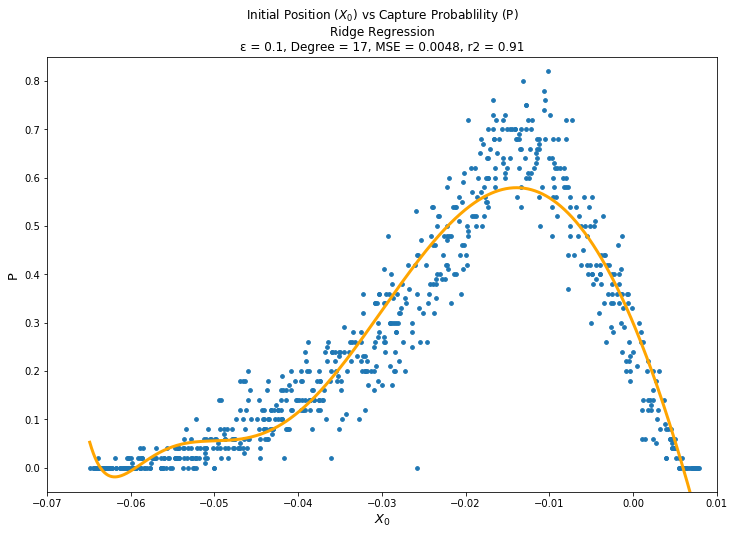

In [143]:
graph_x = np.linspace(x0[0],x0[-1],1000).reshape(-1,1)
graph_y = poly_ridge.predict(graph_x)

plt.figure(figsize=(12,8))
plt.scatter(x0,P, s = 14)
plt.plot(graph_x, graph_y, c = 'orange', linewidth =3)
plt.axis([-0.07,0.01,-0.05,0.85])
plt.title("Initial Position ($X_0$) vs Capture Probablility (P)\nRidge Regression\n\u03B5 = {}, Degree = {}, MSE = {:.2}, r2 = {:.2}".format(alpha, degree,test_error_mse,test_error_r2))
plt.xlabel("$X_0$", fontsize = 13)
plt.ylabel("P", fontsize = 13)
#plt.savefig("graphs/x0vsP02-3.png")
plt.show()

## Analysis

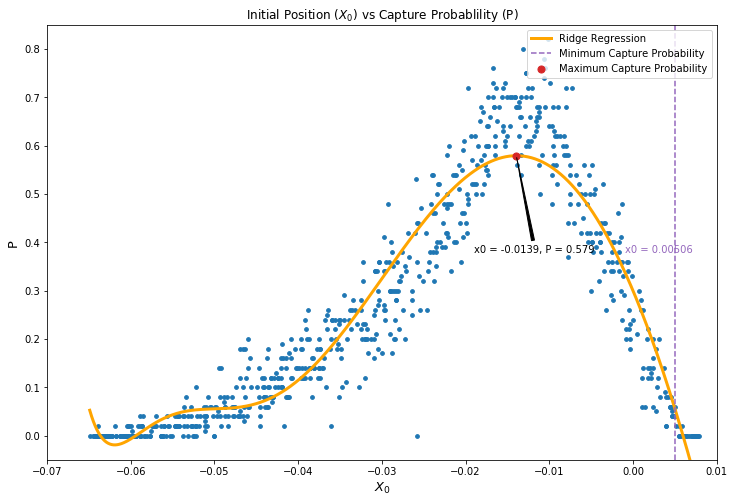

In [144]:
ix = list(graph_y).index(max(graph_y))
plt.figure(figsize=(12,8))
plt.scatter(x0,P,s=14)
plt.plot(graph_x, graph_y, c = 'orange', linewidth =3, zorder=1, label="Ridge Regression")
#plt.axvline(x=graph_x[ix], c= 'tab:red', label = "Maximum Capture Probability")
plt.scatter(graph_x[ix],graph_y[ix], c = 'tab:red', zorder=2, s=50, label="Maximum Capture Probability")
plt.annotate('x0 = {:.3}, P = {:.3}'.format(graph_x[ix][0],graph_y[ix]), xy=(graph_x[ix], graph_y[ix]), xytext=(graph_x[ix]-0.005, graph_y[ix]-0.2),
             arrowprops=dict(facecolor='black', arrowstyle = 'wedge'))
plt.text(graph_x[len(graph_y)-39]-0.006, graph_y[ix]-0.2, 'x0 = {:.3}'.format(graph_x[len(graph_y)-39][0]), color='tab:purple', fontsize=10)
plt.axvline(x=graph_x[len(graph_y)-39], c= 'tab:purple',linestyle='--', label = "Minimum Capture Probability")
plt.axis([-0.07,0.01,-0.05,0.85])
plt.title("Initial Position ($X_0$) vs Capture Probablility (P)")
plt.xlabel("$X_0$", fontsize = 13)
plt.ylabel("P", fontsize = 13)
plt.legend(loc=1)#bbox_to_anchor=(1.1, 1.05)
#plt.savefig("graphs/x0vsP02-4.png")
plt.show()

In [145]:
print(graph_x[ix],graph_y[ix]) # max

[-0.01393852] 0.579150356983335


In [146]:
print(graph_x[len(graph_y)-39]) #min

[0.00506396]
